## Import the Data and Clean up

In [16]:
# import library
import pandas as pd
import numpy as np

# import mean train data set using pd
men_data = pd.read_csv('mens_train_file.csv', low_memory=False)

# import womean train data set using pd
women_data = pd.read_csv('womens_train_file.csv', low_memory=False)

# append gender
men_data['gender'] = 'mens'
women_data['gender'] = 'womens'

# verify the shapes
print(men_data.shape)
print(women_data.shape)

(5000, 27)
(5000, 27)


In [17]:
df = pd.concat([men_data, women_data])

In [18]:
df.shape

(10000, 27)

In [19]:
df.head()

,id,outcome,serve,rally,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,...,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,gender
0,5718,UE,1,4,B,35.52,-0.02,3.47,6.80,0,...,1.35,2.45,0.71,12.56,2.07,1,F,0.45,0,mens
1,371,FE,2,4,B,33.38,1.11,2.54,2.61,0,...,0.76,0.58,3.86,12.35,5.11,0,B,0.43,0,mens
2,7948,FE,1,23,B,22.32,-0.25,3.53,9.44,0,...,0.38,1.12,2.91,13.86,1.66,0,F,0.40,1,mens
3,9312,UE,1,9,F,36.84,0.77,0.59,3.34,1,...,1.24,3.26,0.56,14.26,0.16,1,B,0.67,1,mens
4,7667,W,1,4,B,35.54,0.12,0.92,5.50,0,...,0.17,1.43,3.95,11.37,1.11,0,F,0.34,0,mens


In [20]:
print(df.hitpoint.unique())
print(df['previous.hitpoint'].unique())

['B' 'F' 'U' 'V']
['F' 'B' 'V' 'U']


In [21]:
# replace values with 0, 1, 2, 3 using dict for previous hitpoints
df['previous.hitpoint'] = df['previous.hitpoint'].replace({'U': 0, 'F': 1, 'B': 2, 'V':3})

# replace values with 0, 1, 2, 3 using dict for hitpoints
df['hitpoint'] = df['hitpoint'].replace({'U': 0, 'F': 1, 'B': 2, 'V':3})

# replace values with 0, 1 using dict for gender
df['gender'] = df['gender'].replace({'mens': 0, 'womens': 1})

df['previous.hitpoint'] = df['previous.hitpoint'].astype('category').cat.codes
df['hitpoint'] = df['hitpoint'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes
df['outside.sideline'] = df['outside.sideline'].astype('category').cat.codes
df['outside.baseline'] = df['outside.baseline'].astype('category').cat.codes
df['same.side'] = df['same.side'].astype('category').cat.codes
df['server.is.impact.player'] = df['server.is.impact.player'].astype('category').cat.codes

In [22]:
print(df.outcome.unique())

['UE' 'FE' 'W']


In [23]:
# replace values with 0, 1, 2 using dict for previous hitpoints
df['outcome'] = df['outcome'].replace({'UE': 0, 'FE': 1, 'W': 2})

df['outcome'] = df['outcome'].astype('category').cat.codes

In [24]:
# import library
from sklearn.model_selection import train_test_split

# adding a seed called random_state in train_test_split so that split is reproducible
random_state = 1

# X matrix (features / independent variables)
X = df.drop(['outcome', 'id'], axis=1)

# y matrix (target / dependent variable) will be: T_degC
y = df['outcome']

# build out the following: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)

In [25]:
#y_train = pd.DataFrame(y_train)

In [26]:
#y_test = pd.DataFrame(y_test)

In [27]:
y_test.shape

(2000,)

In [28]:
X_train.shape

(8000, 25)

In [32]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian')
kde.fit(X_train)
new_data = kde.sample(500, random_state=0)
new_data=pd.DataFrame(new_data, columns=X_train.columns)
data_app=X_train.append(new_data,ignore_index=True)

In [33]:
X_train.shape

(8000, 25)

In [35]:
new_data.shape

(500, 25)

In [ ]:
xnew = matrix (NA_real_, nrow = (ncol (X_train)^2 - ncol (X_train)) / 2, ncol = nrow (X_train))
for (i in 1 : nr) 
    xnew [,i] <- feature.gen (X_train[i,])

## Create the Model

In [15]:
# import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# create a dictionary of parameters 
param_grid = {'n_estimators':list(range(100, 1100, 100)),
              'max_depth': list(range(1, 11, 2)),
              'max_features': ['auto', 2, 4, 'sqrt', 'log2'],
              'min_samples_split':[2, 4, 8], 
             }

# create Random Forest model
rf_obj = RandomForestClassifier()

# create gridsearch object with various combinations of parameters
base_model_rnd_clf = RandomizedSearchCV(rf_obj, param_grid, cv = 5, refit = True,
                       n_jobs=-1, verbose = 5)

base_model_rnd_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:   22.3s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.6s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [26]:
# predict probabilities
y_pred_proba_base_model_test = base_model_rnd_clf.best_estimator_.predict_proba(X_test)

# predict classes
y_pred_base_model_test = base_model_rnd_clf.best_estimator_.predict(X_test)

print('First 5 predicted probabilities:\n', y_pred_proba_base_model_test[0:5])
print('\nFirst 5 predictions:\n',y_pred_base_model_test[0:5])

First 5 predicted probabilities:
 [[0.1851626  0.76943061 0.04540679]
 [0.4011063  0.41524907 0.18364463]
 [0.19143459 0.08976476 0.71880065]
 [0.14135016 0.06267184 0.79597801]
 [0.19105904 0.71158427 0.09735669]]

First 5 predictions:
 [1 1 2 2 1]


## Check out the model generalization with test data

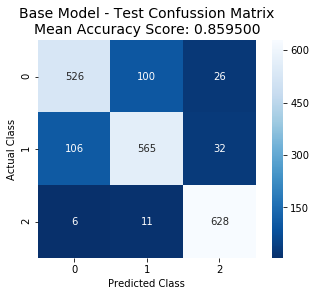

In [27]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# mean error evaluation using the .score() method
base_model_rdn_clf_score_test = base_model_rnd_clf.best_estimator_.score(X_test, y_test)

base_model_rdn_clf_confusion_matrix_test = metrics.confusion_matrix(y_test, y_pred_base_model_test)

df_cm = pd.DataFrame(base_model_rdn_clf_confusion_matrix_test, range(3), range(3))

sns.heatmap (df_cm, fmt='d',
             cmap='Blues_r', annot=True, square = True)

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

base_model_test_title = 'Base Model - Test Confussion Matrix\nMean Accuracy Score: {0:2f}'.format(base_model_rdn_clf_score_test)
plt.title(base_model_test_title, size = 14)
plt.show;

In [32]:
# import library
from sklearn.metrics import classification_report

base_model_rnd_clf_classification_report_test = classification_report(y_test, y_pred_base_model_test)
print('\033[1m'+'  RandomForestClassifier - Classification Report on Test Data\n'+'\033[0m', base_model_rnd_clf_classification_report_test)

  RandomForestClassifier - Classification Report on Test Data
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       652
           1       0.84      0.80      0.82       703
           2       0.92      0.97      0.94       645

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



## See how the model overfits on train

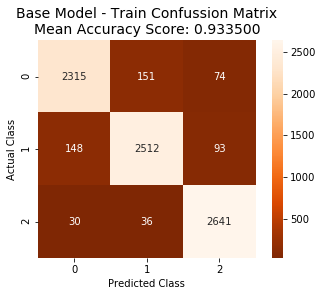

In [29]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# predict classes
y_pred_base_model_train = base_model_rnd_clf.best_estimator_.predict(X_train)

# mean error evaluation using the .score() method
base_model_rdn_clf_score_train = base_model_rnd_clf.score(X_train, y_train)

base_model_rdn_clf_confusion_matrix_train = metrics.confusion_matrix(y_train, y_pred_base_model_train)

df_cm = pd.DataFrame(base_model_rdn_clf_confusion_matrix_train, range(3), range(3))

sns.heatmap (df_cm, fmt='d',
             cmap='Oranges_r', annot=True, square = True)

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

base_model_train_title = 'RandomForestClassifier - Confussion Matrix on Train Data \nMean Accuracy Score: {0:2f}'.format(base_model_rdn_clf_score_train)
plt.title(base_model_train_title, size = 14)
plt.show;

In [31]:
# import library
from sklearn.metrics import classification_report

base_model_rnd_clf_classification_report_train = classification_report(y_train, y_pred_base_model_train)
print('\033[1m'+'  RandomForestClassifier - Classification Report on Train Data\n'+'\033[0m', base_model_rnd_clf_classification_report_train)

  RandomForestClassifier - Classification Report on Train Data
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      2540
           1       0.93      0.91      0.92      2753
           2       0.94      0.98      0.96      2707

    accuracy                           0.93      8000
   macro avg       0.93      0.93      0.93      8000
weighted avg       0.93      0.93      0.93      8000



## Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth = 20, 
                                 n_estimators = 500, 
                                 learning_rate = 1.0)

gbrt.fit (X_train , y_train)

In [ ]:
# predict probabilities
y_pred_proba_gbrt_test = gbrt.predict_proba(X_test)

# predict classes
y_pred_gbrt_test = gbrt.predict(X_test)

print('First 5 predicted probabilities:\n', y_pred_proba_gbrt_test[0:5])
print('\nFirst 5 predictions:\n',y_pred_gbrt_test [0:5])

In [ ]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# mean error evaluation using the .score() method
gbrt_score_test = gbrt.score(X_test, y_test)

gbrt_confusion_matrix_test = metrics.confusion_matrix(y_test, y_pred_gbrt_test)

df_cm = pd.DataFrame(gbrt_confusion_matrix_test, range(3), range(3))

sns.heatmap (df_cm, fmt='d',
             cmap='Blues_r', annot=True, square = True)

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

gbrt_test_title = 'Base Model - Test Confussion Matrix\nMean Accuracy Score: {0:2f}'.format(gbrt_score_test)
plt.title(gbrt_test_title, size = 14)
plt.show;

In [ ]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


y_pred_gbrt_train = gbrt.predict(X_train)

# mean error evaluation using the .score() method
gbrt_score_train = gbrt.score(X_train, y_train)

gbrt_confusion_matrix_train = metrics.confusion_matrix(y_train, y_pred_gbrt_train)

df_cm = pd.DataFrame(gbrt_confusion_matrix_train, range(3), range(3))

sns.heatmap (df_cm, fmt='d',
             cmap='Oranges_r', annot=True, square = True)

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

gbrt_test_title = 'Base Model - Test Confussion Matrix\nMean Accuracy Score: {0:2f}'.format(gbrt_score_train)
plt.title(gbrt_test_title, size = 14)
plt.show;